# Baseball

We all know that a baseball club has to spend tons of money to hire players for wins. In terms of statistics, I will try to find out three questions:
    1. What does a team with highest win rate look like? Is it realted to how much the team paid for players or the number of bases it had?
    2. Can a team with low salary payments win a lot?
    
I will use three datasets, Batting, Salaries and Teams, to try to find out answeres of these two problem.

I will read these three datasets and have a glance at it.

In [1]:
import pandas as pd
import numpy as np
batting_df = pd.read_csv('Batting.csv')
salaries_df = pd.read_csv('Salaries.csv')
teams_df = pd.read_csv('Teams.csv')


After loading all three datasets, I can see columns of yearID and teamID in common, and the batting table and the salary table have playerID in common as well. We can merge tables based on these common columns later on.

In [2]:
batting_df.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


In [3]:
salaries_df.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [4]:
teams_df.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.838,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,NaN,0.814,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,NaN,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.839,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


Since we have data of over 100 years and salaries cannot be compared from different years due to inflation. I will only compare teams or players within the same year. I will the latest year, 2016, as an example for the analysis.
For the first question, I will list all the teams out in the same year and to compare team's numbers of wins and sum of salaries.

In [5]:
year = 2016

I will set up the default float with 3 digits.

In [6]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

I merge two tables, salary table and team table, and I sum up all players' salaries in same teams separately, so I can have total salaries for each team in 2016. I will also remove rows with Nan on salaries for data cleaning. Since I am going to analyze the relationships between wins and variables, I will keep the column of 'W', which stands for wins. I added one column named 'costperwin' to find out how much a team cost to play a win game based on the team's salary.

In [7]:
# I grouped salary of the whole team by year and team and merge it with the table of teams.
team_salaries_df_full =pd.merge(salaries_df.groupby(['yearID','teamID'],as_index=False).sum(),teams_df,on=['yearID','teamID'],how = 'left')
#remove teams that have Nan data and pick the year
team_salaries_in_the_year =  team_salaries_df_full[team_salaries_df_full['yearID']==year]
team_salaries_df=team_salaries_in_the_year[np.isfinite(team_salaries_in_the_year['W'])].reset_index()
# Add a column of cost per win
team_salaries_df = team_salaries_df[['yearID','teamID','salary','W']].assign (costperwin = lambda x: x.salary/x.W)
# Sort the table with the number of wins in a decending order
team_salaries_df = team_salaries_df.sort_values(['W'],ascending =[False])
team_salaries_df.head()


,yearID,teamID,salary,W,costperwin
17,2016,TEX,176038723,95.000,1853039.189
5,2016,CLE,74311900,94.000,790552.128
3,2016,BOS,188545761,93.000,2027373.774
18,2016,TOR,138701700,89.000,1558446.067
2,2016,BAL,161863456,89.000,1818690.517


I think scoring is very important to get wins. In order to keep the table clear, I only keep columns of R (runs), H (hits), 2B(doubles), 3B(tribles) and HR(homeruns).

In [8]:

team_bases_df = teams_df[teams_df['yearID']== year].dropna(axis = 0, how = 'any').reset_index()[['yearID','teamID','W','R','H','2B','3B','HR']]
team_bases_df = team_bases_df.sort_values(['W'],ascending =[False])
team_bases_df.head()

,yearID,teamID,W,R,H,2B,3B,HR
5,2016,CHN,103,808,1409,293,30,199
29,2016,WAS,95,763,1403,268,29,203
27,2016,TEX,95,765,1446,257,23,215
7,2016,CLE,94,777,1435,308,29,185
3,2016,BOS,93,878,1598,343,25,208


I created a function of standadization as well to standadize all the data for visualiztions and concatenated standardized data with the original data.

In [9]:
def standardize (x):
    meanx = x.mean()
    stdx = x.std(ddof = 0)
    return (x - meanx)/stdx

team_salaries_df_std =pd.concat([team_salaries_df,team_salaries_df[['salary','W']].apply(standardize).rename(columns = {'salary':'stdsalary','W':'stdW'})],axis = 1)
team_bases_df_std = pd.concat([team_bases_df,team_bases_df[['W','R','H','2B','3B','HR']].apply(standardize).rename(columns = {'W':'stdW','R':'stdR','H':'stdH','2B':'std2B','3B':'std3B','HR':'stdHR'})],axis = 1)


Now I have tables of wins, salaries, runs and scorings, so I will create scatter plots to show relationsships between wins and these factors.
Before that, I need to creat a function of scatters to visualize data. Since all data here are standardized, x=0 and y=0 are means for x axis and y axis separately and these two lines are highlighted with black.
In order to find out correlations, I create a function named correlations to calculate the correlations between wins and factors to see if wins are correlated to any of them.

Populating the interactive namespace from numpy and matplotlib


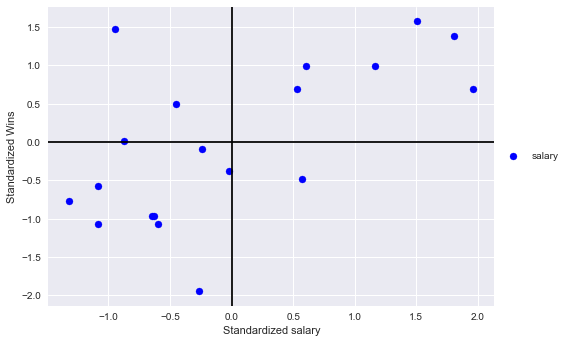

0.6144777278373326

In [10]:
# create a plot to see the relationships between salary and wins.
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
def draw_plot_of_bases(db,bases,cr= 'b',legend_label = None):
    plt.scatter(x = db[('std'+bases)],y = db['stdW'],color = cr,label = legend_label)
    plt.xlabel('Standardized '+bases)
    plt.ylabel('Standardized Wins')
    plt.axvline(x = 0, color = 'black')
    plt.axhline(y = 0, color = 'black')
    plt.legend(numpoints=1, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    
def correlations (x,y):
    meanx = x.mean()
    meany = y.mean()
    stdx = x.std(ddof=0)
    stdy = y.std(ddof=0)
    return (((x-meanx)/stdx)*((y-meany)/stdy)).mean()

draw_plot_of_bases(team_salaries_df_std,'salary',legend_label = 'salary')
correlations(team_salaries_df['W'],team_salaries_df['salary'])

We can roughly find out the trend from the graph above. On the right of the graph, which has teams paying salaries more than the average, most teams wins more than the average as well. On the other side, most teams have fewer wins than the average. The value of Pearson's R is 0.614. It means the number of wins will increase while the salary of the entire team increases. Though it is not very significant but it still show the trend of the relationships.

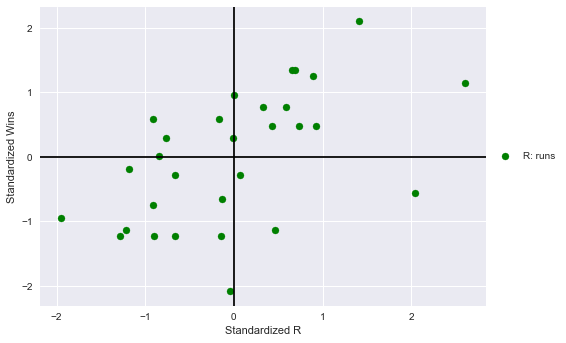

In [11]:
draw_plot_of_bases(team_bases_df_std,'R','g',legend_label =  "R: runs")

Correlation:

In [12]:
correlations(team_bases_df['W'],team_bases_df['R'])

0.5412750741845679

The graph shows a trend between wins and runs. And the Pearson's R value shows a linear relationship between these two variables as well. The number of wins is positively related to runs. Teams with more wins generally had more runs in the games. 

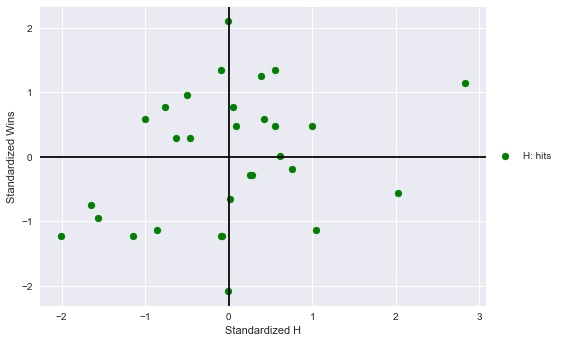

In [13]:
draw_plot_of_bases(team_bases_df_std,'H','g',legend_label =  "H: hits")

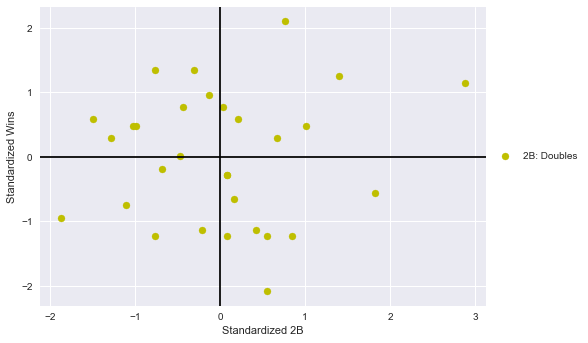

In [14]:
draw_plot_of_bases(team_bases_df_std,'2B','y',legend_label =  '2B: Doubles')

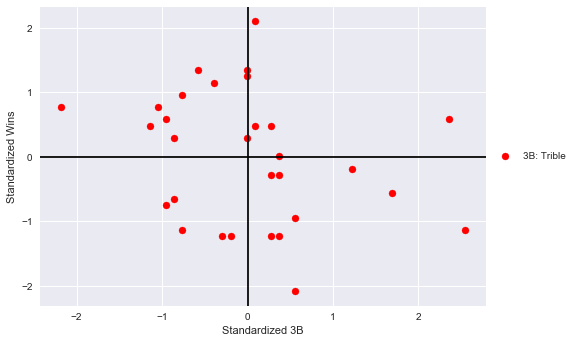

In [15]:
draw_plot_of_bases(team_bases_df_std,'3B','r','3B: Trible')

Three graphs above, hit, 2B and 3B, do not show clear trends. The random distributions mean the wins and the hits, 2B and 3B may not be related. In other words, a team could have many hits or 2B but it might not have wins above average.

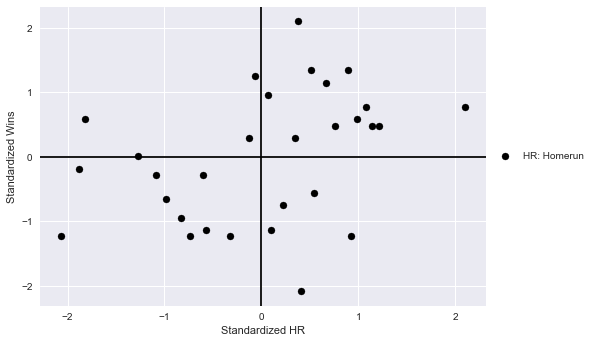

In [16]:
draw_plot_of_bases(team_bases_df_std,'HR','black','HR: Homerun')

Correlation:

In [17]:
correlations(team_bases_df['W'],team_bases_df['HR'])

0.3712290022454171

The graph of homerun does not have very clear trend but we can still find it is positively related. The Pearson's R is 0.371. With the number of homeruns increasing, the wins increase as well, but that is not significant. This does make sense, since more homeruns bring more scores and the team has a higher possibility to win games.

From what we find out from all of these teams in 2016, we can see that the general trend that the more a team spend on salary, the higher possibility the team will have to get more wins. It seems not fair to small club with not much budget. Fortunately, I found a team with not much budge but still get many wins. That is Cleveland Indians. 

I will list the team table with teams' salaries in an ascending order of cost per win, and we can see how cost effective this team was in 2016.

In [18]:
team_salaries_df[team_salaries_df['W']>team_salaries_df['W'].mean()].sort_values('costperwin')

,yearID,teamID,salary,W,costperwin
5,2016,CLE,74311900,94.000,790552.128
10,2016,MIA,77314202,79.000,978660.785
8,2016,HOU,94893700,84.000,1129686.905
18,2016,TOR,138701700,89.000,1558446.067
16,2016,SEA,135683339,86.000,1577713.244
2,2016,BAL,161863456,89.000,1818690.517
17,2016,TEX,176038723,95.000,1853039.189
3,2016,BOS,188545761,93.000,2027373.774
7,2016,DET,194876481,86.000,2266005.593


For all the teams with all the win rate over the average, Cleveland got the second highest win rate and the lowest cost per win.

I will merge the table of batting and players' salaries to see this team's players individually and compare them to players from other teams.

In [19]:
batting_salary_df = pd.merge(salaries_df,batting_df,on = ['playerID','yearID','teamID','lgID'],how = 'left')
batting_salary_df = batting_salary_df[np.isfinite(batting_salary_df['stint'])]
batting_salary_CLE_2016 = batting_salary_df[((batting_salary_df['teamID'] == 'CLE') & (batting_salary_df['yearID'] == year))]
batting_salary_CLE_2016.head()

,yearID,teamID,lgID,playerID,salary,stint,G,AB,R,H,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
25755,2016,CLE,AL,allenco01,4150000,1.000,67.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25756,2016,CLE,AL,anderco01,511400,1.000,19.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25757,2016,CLE,AL,bauertr01,1697500,1.000,35.000,5.000,0.000,0.000,...,0.000,0.000,0.000,0.000,5.000,0.000,0.000,1.000,0.000,0.000
25758,2016,CLE,AL,brantmi02,7375000,1.000,11.000,39.000,5.000,9.000,...,7.000,1.000,0.000,3.000,6.000,1.000,0.000,0.000,1.000,1.000
25759,2016,CLE,AL,byrdma01,1000000,1.000,34.000,115.000,11.000,31.000,...,19.000,0.000,0.000,11.000,38.000,1.000,0.000,0.000,3.000,1.000


To see how Cleveland could fight Chicago Cubs in the world series with such a low cost of salary. Since runs are a main approach for a team to score in a game, I summarize the data of runs among all players in 2016.



In [20]:
batting_salary_df[batting_salary_df['yearID'] == year][['R']].describe()

,R
count,505.000
mean,23.966
std,32.613
min,0.000
25%,0.000
50%,3.000
75%,44.000
max,123.000


Since not all players are paid for runs, I will pick the top 25%, which are the players having runs over 44 in 2016, into the analysis to see how much players with many runs cost in a team.

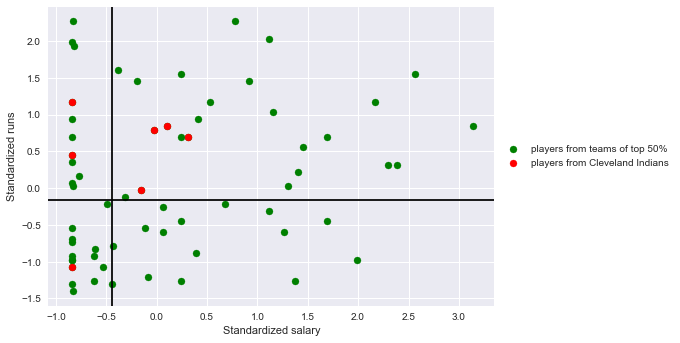

In [21]:
batting_salary_df_2016 = batting_salary_df[batting_salary_df['yearID'] == year]
batting_salary_df_2016_44 = batting_salary_df_2016[batting_salary_df_2016['R']>44]

batting_salary_df_2016_44_std = pd.concat([batting_salary_df_2016_44,batting_salary_df_2016_44[['salary','R']].apply(standardize).rename(columns = {'R':'stdR','salary':'stdsalary'})],axis = 1)
def scatter_salary_runs(team,cr,lb):
    return plt.scatter(x = batting_salary_df_2016_44_std[(batting_salary_df_2016_44_std['teamID'].apply(lambda x: x in team))]['stdsalary'],y = batting_salary_df_2016_44_std[(batting_salary_df_2016_44_std['teamID'].apply(lambda x: x in team))]['stdR'],color = cr,label = lb)
teams_winrate_aboveavg = team_salaries_df[team_salaries_df['W']>team_salaries_df['W'].mean()]['teamID'].values

scatter_salary_runs(teams_winrate_aboveavg,'g','players from teams of top 50%')

scatter_salary_runs(['CLE'],'r','players from Cleveland Indians')
#plt.scatter(x = batting_salary_df_2016_44_std['stdsalary'],y = batting_salary_df_2016_44_std['stdR'],facecolor = 'b',alpha = 0.5, label = 'Runs')

#plt.scatter(x = batting_salary_df_2016_44_std[(batting_salary_df_2016_44_std['teamID'] == 'CLE')]['stdsalary'],y = batting_salary_df_2016_44_std[(batting_salary_df_2016_44_std['teamID'] == 'CLE')]['stdR'],color = 'r',label = 'CLE')
#plt.scatter(x = batting_salary_df_2016_44_std[(batting_salary_df_2016_44_std['teamID'] == 'TEX')]['stdsalary'],y = batting_salary_df_2016_44_std[(batting_salary_df_2016_44_std['teamID'] == 'TEX')]['stdR'],color = 'g',label = 'TEX')
plt.xlabel('Standardized salary')
plt.ylabel('Standardized runs')
plt.axvline(x = np.median(batting_salary_df_2016_44_std['stdsalary']), color = 'black')
plt.axhline(y = np.median(batting_salary_df_2016_44_std['stdR']), color = 'black')
plt.legend(numpoints=1, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

The vertical line is the median of salary and the horizontal line is the median of runs from all of players. In this graph, I just pick teams have wins above average and players have runs in the top 25%, which are above 44. For players with salaries below the median, we can find Cleveland Indians has three players in this area and two of them have runs over median runs. These three players were paid almost minimum wages. And for players above median salaries, Cleveland Indians has four players and they all have runs over the median runs. Even comparing to players having higher salary, these four players still perform better than most of them. 
If we dig a little bit deeper, we can find these three players,José Ramírez, Tyler Naquin, Francisco Lindor, who have salaries lower than the median are very young and they all played no more than 5 years.

Comparing Cleveland Indians to other teams can help me to see how effective it is. I will create two pie chart, each demonstrating percentage each team took in salaries and runs among the top 9 teams. 

In [22]:
team_salaries_bases_df = team_salaries_df.merge(team_bases_df,left_on = ['teamID','yearID','W'], right_on = ['teamID','yearID','W'], how = 'inner')

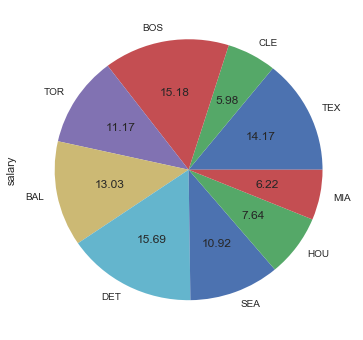

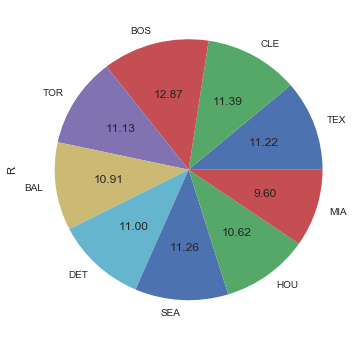

In [23]:

team_salaries_bases_df[team_salaries_bases_df['teamID'].apply(lambda x: x in teams_winrate_aboveavg)]['salary'].plot.pie(labels = team_salaries_bases_df['teamID'], autopct='%.2f',figsize=(6,6))
plt.show()
team_salaries_bases_df[team_salaries_bases_df['teamID'].apply(lambda x: x in teams_winrate_aboveavg)]['R'].plot.pie(labels = team_salaries_bases_df['teamID'], autopct='%.2f',figsize=(6,6))
plt.show()


Two pie charts above show the salary and runs from the top 9 teams in the league in the year of 2016. We can see Cleveland Indians spends the least, only 5.98% of salaries of all the 9 teams, but has the second highest number of runs, 11.39%. That is a high return for Cleveland at such a low cost. 

## Conclusion

In order to find out factors affecting wins, this dataset does not have enough data to interpret correlations between wins and factors above. Information from coarches and weathers could be another factors inluencing win rate. For now, we can roughly see trends between wins and some variables, but a more detailed model should be found by regressions or machine learning, which are not involved here.

We can still find something interesting from what we have. In the year of 2016, I found the number of wins of a team was positively related to the salaries of the team, runs and the number of homeruns. However, it does not mean a team with higher salaries, more runs and homeruns can get more wins. 

However, a team with relatively low salaries has chances to win. Cleveland Indians whose players with low salaries performed outstandingly can also gain tons of wins. Teams with low salaries of player can win a lot and even as good as some big teams, but that is not usual since Cleveland is still the only one that can play such well among all the other teams with salaries lower than the average.